In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


## Theoretical introduction

A neural network is a group of nodes distributed in layers and interconected through weights. The maths behind neural netowrks are similar to linear regression. One layer is the result of multiplying the previous one for a weight and adding a bias. We could say that a layer is the prediction of a linear regression that uses a slope (weight) and intercept (bias). Those parameters will improve through a number of iterations to decrease the prediction error of the network. 

Since the neural networks are systems of linear regressions, our layers would simply be linear combinations of the previous layers. This is a problem we can overcome by applying activation functions in between the layers. This is key to develop models that capture more complex features, not simple linear relationships. 

Each input is processed by each neuron  by multiplying the input and a weight. Then everything is added up, plus a bias parameter, and sent to the activation function. This process is repeated for every single layer untill we get the output.

After that, we calculate the loss. The loss will give us information about how the weights should change. This information will help modify the weights in order to perform better at the next iteration. A deep network is one with two or more hidden layers. 

28x28 pixel images, 784 inputs each with a value between 0 (pitch black) a nd 255 (white pearl). Overall, each image is nothing but a vector of length 784 and we have m images. Therefore, we could have a 784xm matrix (each colum being an example).

We are going to build a network sith a single hidden layer. The input layer is going to have 784 nodes. The hidden layer with 10 units. The output layer is going to have 10 layers as well. We will apply this architecture to the MINST dataset to develop a number classification algorithm.

Forward propagation:

We process an image with the network and compute the output. It goes from A[0] (input layer) to Z[1] (the unactivated hidden layer).

        Z[1] =  w[1]  *  A[0]  +  b[1]
                 ^                 ^
              weights             bias
             
        10xm   10x784    784xm    10x1
             
We are going to compute de dot product between the weight matrix and our input. After that, we apply an actication function to the hidden layer Z[1]. If we did not, each node would be a linear combination of the nodes in the previous layer plus a bias. It would just be some linear regression unable to capture the features. With activation functions we allow our model to become more complex.
        
Some comon activation functions:

    * Tanh
    * Sigmoid
    * ReLU (rectified linear unit) [x if x > 0 else 0]
    
We are going to use ReLu as our activation function. Therefore:

        A[1] = g(Z[1]) = ReLU(Z[1]) = ReLU(w[1] * A[0] + b[1])
        
A[1] is the input of or output layer Z[2] (or the activated z[1] layer)

        Z[2] = w[2] * A[1] + b[2]
        
        10xm  10x10  10xm   10x1

A[2] is our output 

        A[2] = softmax(Z[2])

Softmax is another activation function that turns our output layer into probabilities. The idea is that out 10 nodes in the output layer represents a label that is associated with the probability of being the correct one. How it works? The exponential of each node is divided by the sum of all the exponential nodes. This is basically an extension of conditional probabilities. 

Backpropagation:

Our predictions are based on both the weights and biases. We need to find the optimal weights and biases to make the predictions more accurate. To do so, we will use backpropagatiion.

The loss function will give us information about how wrong our output was. Then we go backwards to see how much the weights and biases contributed to the error.

dZ[2] is the error of the output layer. It is the diference between our predictions and the actual labels.

         dZ[2] = A[2] - Y
         
                Y is an one-hot encoded form of the label. For example 4 would be [0,0,0,0,1,0,0,0,0,0]'

         dW[2] = 1/m * dZ[2] * A'[1]             
         
                 Derivative of the loss function with respect to the weights in layer 2
         
         db[2] = 1/m * sum(dZ[2])                 
         
                 Average of the absolute error for the second layer. How much should we tweak our                                                   weights and biases?
         
         dZ[1] = W'[2] * dZ[2] * g'(Z[2])        
         
                 How much error was produced in layer 1. This is basically the reverse path.                                                         Instead of defining the layer 2 as its weights multiplied by the layer 1, the                                                       error in layer 1 is the transposed weights of the second layer multiplied by the                                                   error in layer 2. We apply the weights in reverse to get the error. g' is the                                                       derivative of the activation function. We are reverting it in order to turn our                                                     nodes back into linear  combinations of the nodes in the previous layer.
         
         db[2] = 1/m * sum(dZ[1])                
         
                 Average of the absolute error for the first layer.
         
After finding how much did our parameters contribute to the error, we have to update them in order to improve our predictive capabilities. To do so, we substarct from each weight and bias alpha times its error. Alpha is a learning rate. It is a hyperparameter that moderates how drastic the changes in our weigths and biases will be. A higher alpha implies a higher change between iterations (not so great when you have a fairly accurate model and want to fine tune it).

## Load data

In [144]:
data = pd.read_csv('data/train.csv')

In [145]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train and Test sets

In [151]:
data = np.array(data)
m, n = data.shape

np.random.shuffle(data)

data_train = data[:33600]
data_test = data[33600:]

In [152]:
m, n = data.shape


data_train_dev = data_train.T # So each column is an image
labels_train = data_train_dev[0] # labels
images_train = data_train_dev[1:n] / 255 # images 
# Note: dividing for 255 (max value a pixel can take) is key. We neew to turn the range 0 to 255 into a 0 to 1 range 
# in order to reduce the computational cost

data_test_dev = data_test.T # So each column is an image
labels_test = data_test_dev[0] # labels
images_test = data_test_dev[1:n] / 255 # images

print(f'Each picture has {images_train[:, 0].shape[0]} pixels')
print(f'\nThere are {images_train[0, :].shape[0]} images in the training set')
print(f'\nThere are {images_test[0, :].shape[0]} images in the test set')


Each picture has 784 pixels

There are 33600 images in the training set

There are 8400 images in the test set


## Core functions 

In [211]:
# Initial parameters
def init_params():
    w1 = np.random.rand(10, 784) -0.5
    b1 = np.random.rand(10, 1) -0.5
    
    w2 = np.random.rand(10, 10) -0.5
    b2 = np.random.rand(10, 1) -0.5
    
    return(w1, b1, w2, b2 )


# Activation functions
ReLU = lambda x: np.maximum(x, 0)

softmax = lambda x: np.exp(x) / sum(np.exp(x))

der_ReLU = lambda x: x > 0

                                    
                                    
def forward_prop(w1, b1, w2, b2, dat):
    z1 =   w1.dot(dat) + b1
    a1 = ReLU(z1)
    
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)   
    
    return(z1, a1, z2, a2)

def label_encoder(lab):
    base = np.zeros((lab.size, 10), dtype='int64')
    base[np.arange(lab.size, dtype='int64'), lab] = 1 
    return base.T


def back_prop(z1, a1, z2, a2, w2, dat, lab):
    labels_e = label_encoder(lab)
    dz2 = a2 - labels_e
    dw2 = 1/lab.size * dz2.dot(a1.T)
    db2 = 1/lab.size * np.sum(dz2)
    dz1 = w2.T.dot(dz2) * der_ReLU(z1)
    dw1 = 1/lab.size * dz1.dot(dat.T)
    db1 = 1/lab.size * np.sum(dz1)
    return(dw1, db1, dw2, db2)

def update(alpha, w1, b1, w2, b2, dw1, db1, dw2, db2):
    w1 = w1 -alpha * dw1
    b1 = b1 -alpha * db1
    
    w2 = w2 -alpha * dw2
    b2 = b2 -alpha * db2
    
    return (w1, b1, w2, b2)

pred = lambda p_output: np.argmax(p_output, 0)
accuracy = lambda out, lab: sum(pred(out) == lab) / lab.size

def train(dat, lab, n_iter, alpha):
    w1, b1, w2, b2 = init_params()

    for i in range(n_iter+1):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, dat)
       
        dw1, db1, dw2, db2 = back_prop(z1, a1, z2, a2, w2, dat, lab)
        
        w1, b1, w2, b2 = update(alpha, w1, b1, w2, b2, dw1, db1, dw2, db2)
        
        if i % 50 == 0:
            print(f'Iteration: {i}')
            print(f'Accuracy: {accuracy(a2, lab)}')
            
    return w1, b1, w2, b2

## Training

In [251]:
w1, b1, w2, b2 = train(images_train, labels_train, 1000, 0.15)

Iteration: 0
Accuracy: 0.06675595238095237
Iteration: 50
Accuracy: 0.5372619047619047
Iteration: 100
Accuracy: 0.7051190476190476
Iteration: 150
Accuracy: 0.7755059523809524
Iteration: 200
Accuracy: 0.8078273809523809
Iteration: 250
Accuracy: 0.8276190476190476
Iteration: 300
Accuracy: 0.8399702380952381
Iteration: 350
Accuracy: 0.8484821428571429
Iteration: 400
Accuracy: 0.8549404761904762
Iteration: 450
Accuracy: 0.8601488095238096
Iteration: 500
Accuracy: 0.8653571428571428
Iteration: 550
Accuracy: 0.8690476190476191
Iteration: 600
Accuracy: 0.8723511904761905
Iteration: 650
Accuracy: 0.8757440476190477
Iteration: 700
Accuracy: 0.8792261904761904
Iteration: 750
Accuracy: 0.8812202380952381
Iteration: 800
Accuracy: 0.8836309523809524
Iteration: 850
Accuracy: 0.885297619047619
Iteration: 900
Accuracy: 0.8871428571428571
Iteration: 950
Accuracy: 0.8892261904761904
Iteration: 1000
Accuracy: 0.8914583333333334


## Acurracy assessment with test set

In [262]:
def predict(w1, b1, w2, b2, dat):
    
    _,_,_,a2 = forward_prop(w1, b1, w2, b2, dat)
    
    prediction = pred(a2) 
    return(prediction)

def test(w1, b1, w2, b2, ind, dat, lab):
    
    image = dat[:, ind,None]
    label = lab[ind]
    
    prediction = predict(w1, b1, w2, b2, dat[:, ind,None])
    
    print(f'Label: {label}\nPrediction: {prediction}')
    
    image = image.reshape((28,28))*255
    plt.gray()
    plt.imshow(image, interpolation='nearest')
    plt.show()

In [263]:
predictions_test = predict(w1,b1,w2,b2, images_test)

print(f'Accuracy with the test image set: {round(sum(predictions_test == labels_test)/len(labels_test), 2)}')

Accuracy with the test image set: 0.89


Eventhought it is far from perfect, our number classification algorithm shows promisings results. Nearly 90% of accuracy with no signs of over-fitting. 

Future updates:

    * Make a synthetic dataset including rotations, different number location, etc. This will help the model to classify                  numbers outside the MINST dataset.
    
    * Add more layers to turn it into a CNN. 

## Classification examples

Label: 3
Prediction: [3]


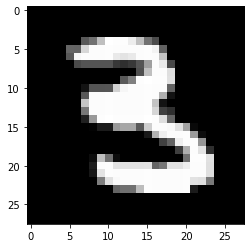

In [265]:
test(w1, b1, w2, b2, 0, images_test, labels_test)

Label: 2
Prediction: [8]


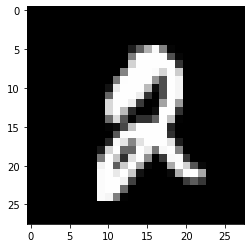

In [266]:
test(w1, b1, w2, b2, 1, images_test, labels_test)

Label: 9
Prediction: [8]


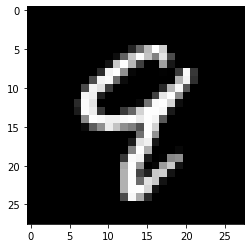

In [267]:
test(w1, b1, w2, b2, 2, images_test, labels_test)

Label: 5
Prediction: [5]


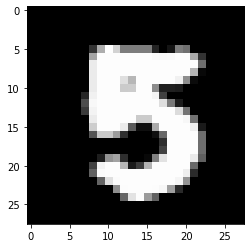

In [268]:
test(w1, b1, w2, b2, 3, images_test, labels_test)

Label: 1
Prediction: [1]


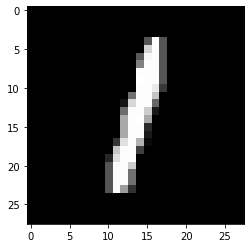

In [269]:
test(w1, b1, w2, b2, 4, images_test, labels_test)

Label: 4
Prediction: [4]


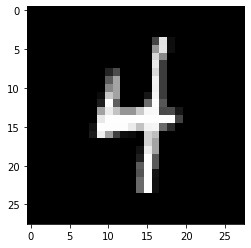

In [270]:
test(w1, b1, w2, b2, 5, images_test, labels_test)

Label: 8
Prediction: [8]


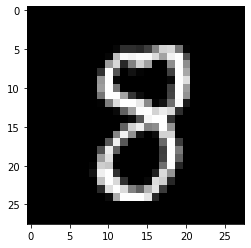

In [275]:
test(w1, b1, w2, b2, 40, images_test, labels_test)

Label: 8
Prediction: [8]


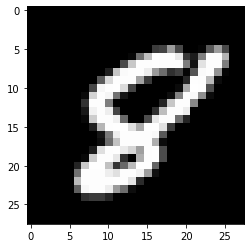

In [276]:
test(w1, b1, w2, b2, 100, images_test, labels_test)

Label: 7
Prediction: [7]


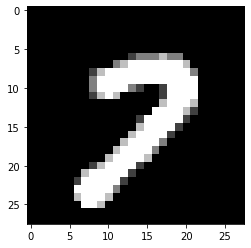

In [277]:
test(w1, b1, w2, b2, 111, images_test, labels_test)